In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
#GENERATE SAMPLE CUSTOMER DATA
np.random.seed(42)

In [4]:
# Create synthetic customer data

np.random.seed(42)
# Create synthetic customer data
n_customers = 500
data = {
    'CustomerID': range(1, n_customers + 1),
    'Age': np.random.randint(18, 70, n_customers),
    'Annual_Income': np.random.randint(15000, 150000, n_customers),
    'Spending_Score': np.random.randint(1, 100, n_customers),
    'Purchase_Frequency': np.random.randint(1, 50, n_customers),
    'Average_Transaction_Value': np.random.randint(20, 500, n_customers),
    'Years_as_Customer': np.random.randint(0, 10, n_customers)
}
df = pd.DataFrame(data)
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (500, 7)

First 5 Rows:
   CustomerID  Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0           1   56         149415              69                  17   
1           2   69          44375              20                  24   
2           3   46          31964              11                   3   
3           4   32         128429              74                  32   
4           5   60          82215              38                  35   

   Average_Transaction_Value  Years_as_Customer  
0                        447                  3  
1                        313                  1  
2                        359                  5  
3                        170                  1  
4                        403                  6  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -


Missing Values:
CustomerID                   0
Age                          0
Annual_Income                0
Spending_Score               0
Purchase_Frequency           0
Average_Transaction_Value    0
Years_as_Customer            0
dtype: int64


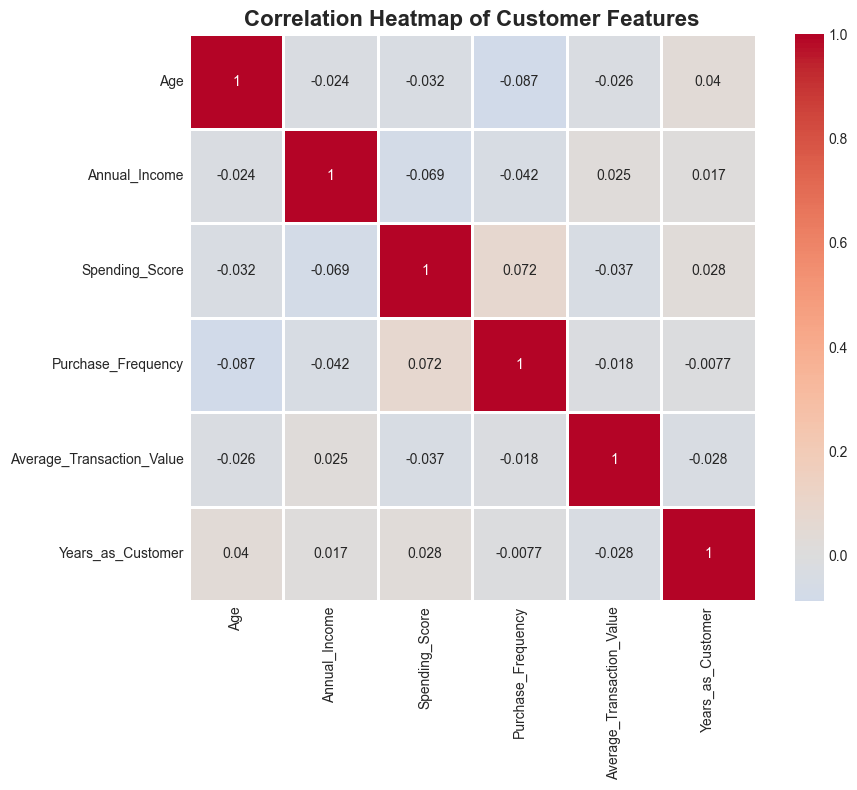

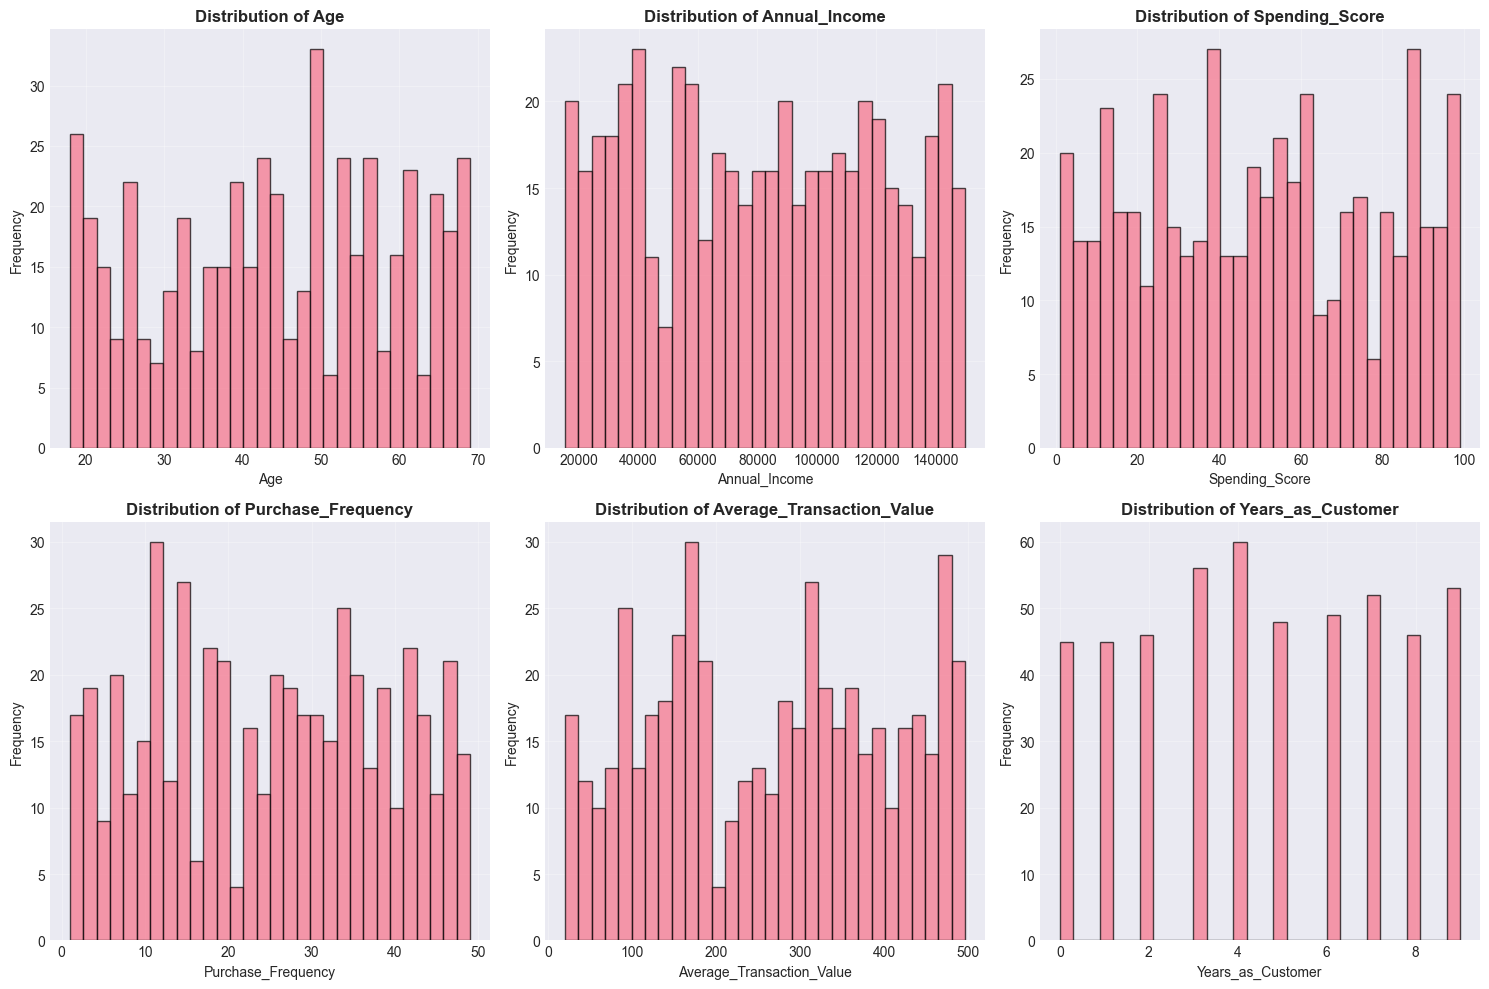

In [7]:
# EXPLORATORY DATA ANALYSIS (EDA)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.drop('CustomerID', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Heatmap of Customer Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['Age', 'Annual_Income', 'Spending_Score', 
            'Purchase_Frequency', 'Average_Transaction_Value', 'Years_as_Customer']

for idx, col in enumerate(features):
    ax = axes[idx//3, idx%3]
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# DATA PREPROCESSING

# Select features for clustering
features_for_clustering = ['Annual_Income', 'Spending_Score', 
                           'Purchase_Frequency', 'Average_Transaction_Value']

X = df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nOriginal Features:")
print(X.head())
print("\nScaled Features:")
print(pd.DataFrame(X_scaled, columns=features_for_clustering).head())


Original Features:
   Annual_Income  Spending_Score  Purchase_Frequency  \
0         149415              69                  17   
1          44375              20                  24   
2          31964              11                   3   
3         128429              74                  32   
4          82215              38                  35   

   Average_Transaction_Value  
0                        447  
1                        313  
2                        359  
3                        170  
4                        403  

Scaled Features:
   Annual_Income  Spending_Score  Purchase_Frequency  \
0       1.720707        0.663439           -0.576986   
1      -0.940391       -1.039825           -0.069714   
2      -1.254813       -1.352670           -1.591531   
3       1.189045        0.837241            0.510026   
4       0.018253       -0.414137            0.727428   

   Average_Transaction_Value  
0                   1.305432  
1                   0.346271  
2        

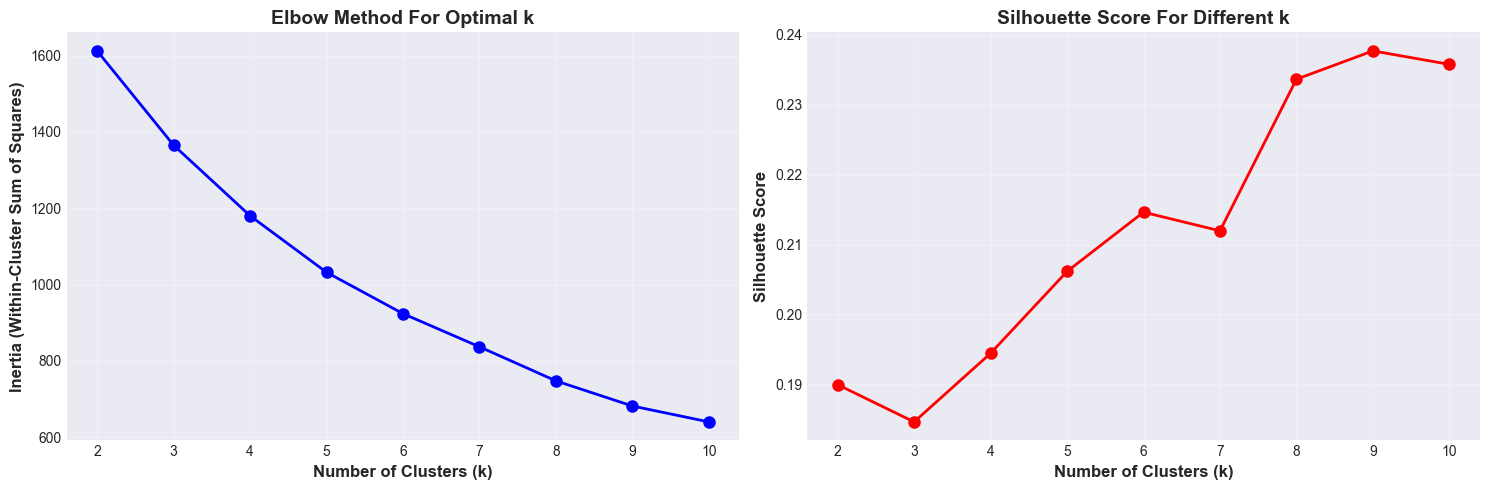

In [9]:
# DETERMINE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Silhouette Score
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score For Different k', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# APPLY K-MEANS CLUSTERING

# Choose optimal number of clusters (based on elbow method)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\n✓ K-Means Clustering completed with {optimal_k} clusters")
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Cluster']):.4f}")

# Cluster distribution
print("\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())


✓ K-Means Clustering completed with 4 clusters
Silhouette Score: 0.1945

Cluster Distribution:
Cluster
0    135
1    124
2    115
3    126
Name: count, dtype: int64



Cluster Centers (Original Scale):
         Annual_Income  Spending_Score  Purchase_Frequency  \
Cluster                                                      
0         88243.896296       30.888889           10.777778   
1         92238.790323       28.258065           36.830645   
2         79421.486957       71.356522           20.582609   
3         65581.341270       72.039683           32.476190   

         Average_Transaction_Value  
Cluster                             
0                       218.081481  
1                       309.104839  
2                       403.321739  
3                       144.126984  


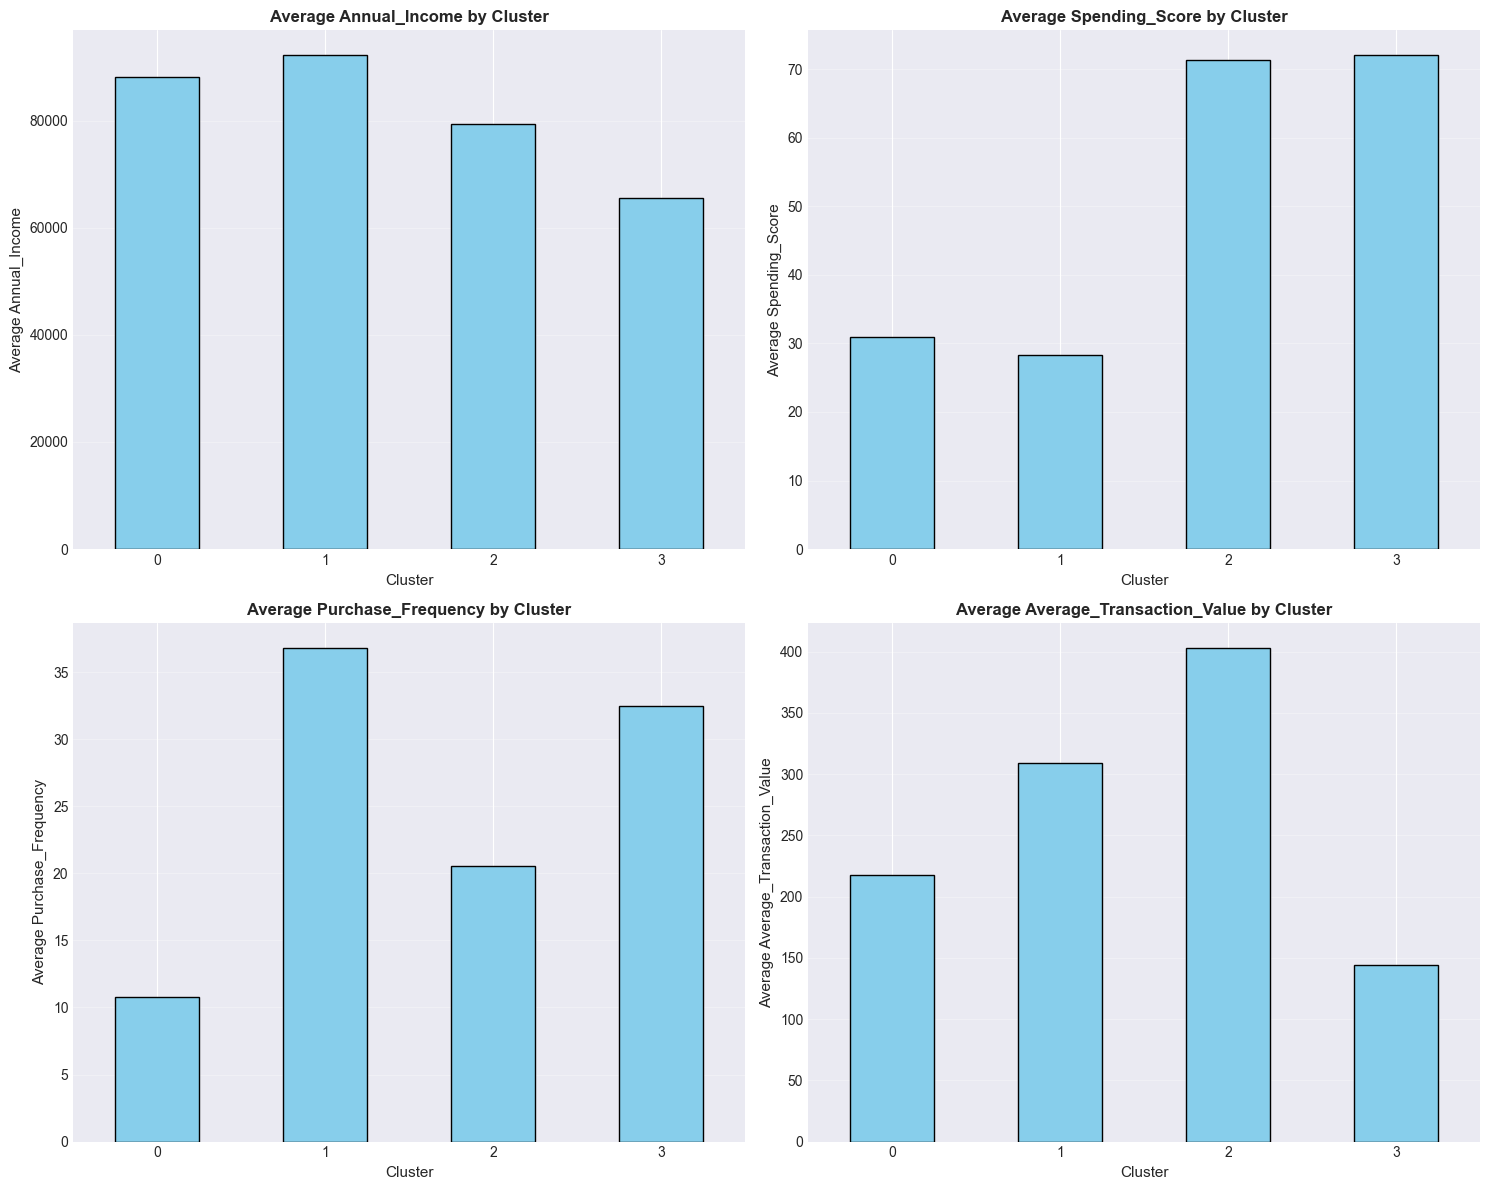

In [11]:
# CLUSTER ANALYSIS

# Calculate cluster statistics
cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()
print("\nCluster Centers (Original Scale):")
print(cluster_summary)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for idx, feature in enumerate(features_for_clustering):
    ax = axes[idx//2, idx%2]
    cluster_summary[feature].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Average {feature} by Cluster', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=11)
    ax.set_ylabel(f'Average {feature}', fontsize=11)
    ax.grid(alpha=0.3, axis='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


PCA Explained Variance Ratio (2D): [0.2847555 0.246565 ]
Total Variance Explained: 53.13%


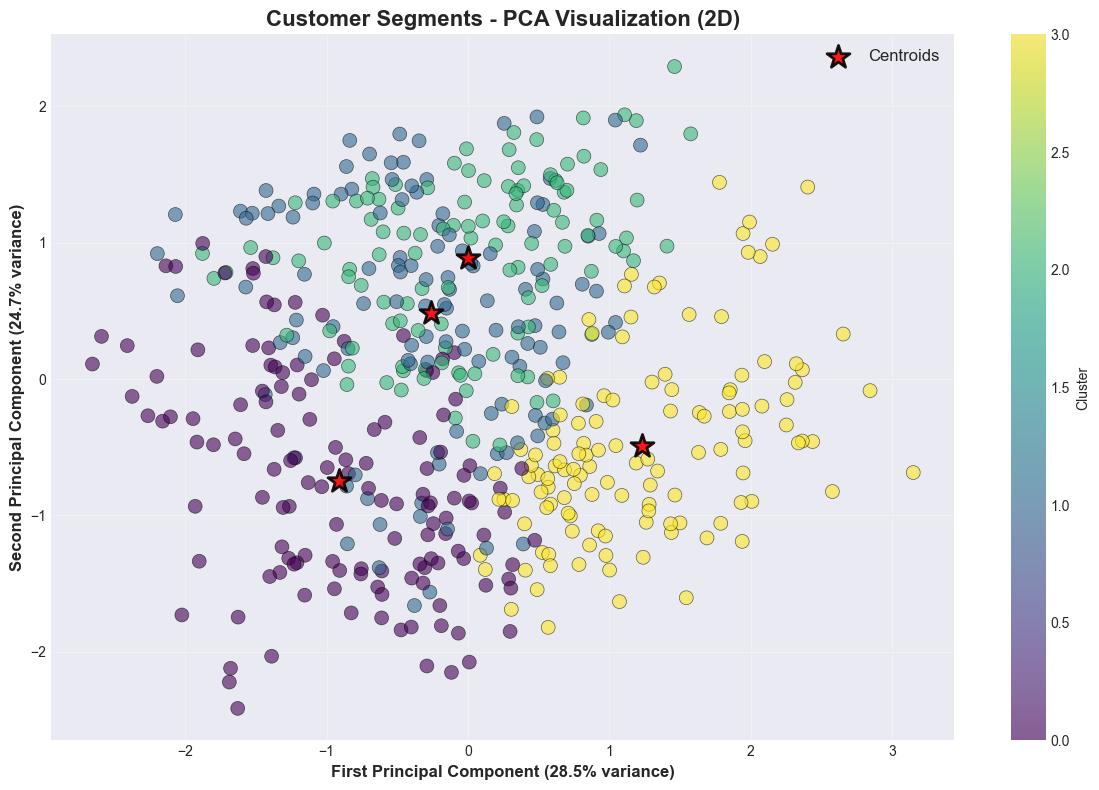

In [12]:
# PCA VISUALIZATION (2D)

# Apply PCA for 2D visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Add PCA components to dataframe
df['PCA1'] = X_pca_2d[:, 0]
df['PCA2'] = X_pca_2d[:, 1]

print(f"\nPCA Explained Variance Ratio (2D): {pca_2d.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], 
                     c=df['Cluster'], 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6, 
                     edgecolors='black',
                     linewidth=0.5)

# Plot cluster centers
centers_pca = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', 
           s=300, 
           alpha=0.9, 
           edgecolors='black', 
           linewidth=2,
           marker='*',
           label='Centroids')

plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', 
          fontsize=12, fontweight='bold')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', 
          fontsize=12, fontweight='bold')
plt.title('Customer Segments - PCA Visualization (2D)', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


PCA Explained Variance Ratio (3D): [0.2847555  0.246565   0.23931811]
Total Variance Explained: 77.06%


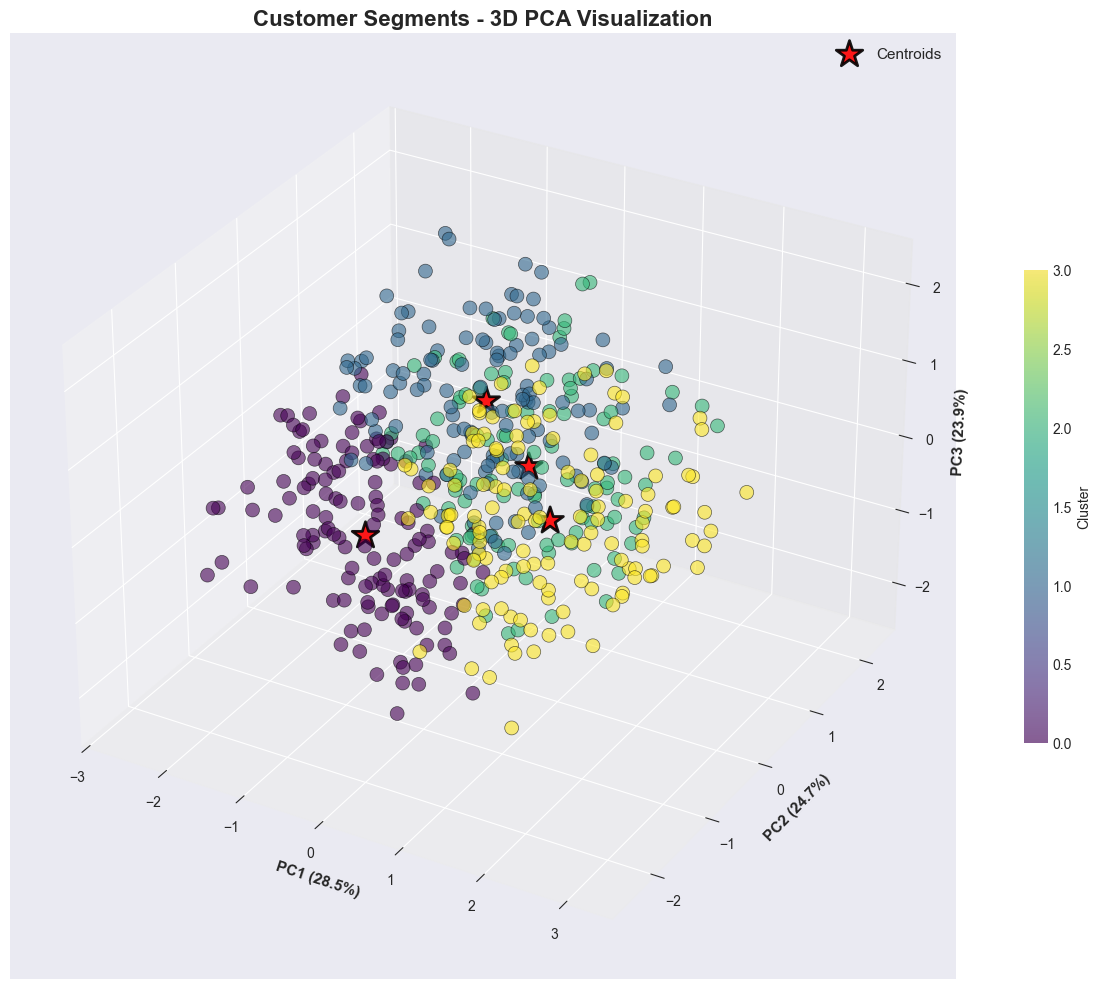

In [13]:
# PCA VISUALIZATION (3D)

from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df['PCA3'] = X_pca_3d[:, 2]

print(f"\nPCA Explained Variance Ratio (3D): {pca_3d.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca_3d.explained_variance_ratio_)*100:.2f}%")

# 3D Scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'],
                    c=df['Cluster'],
                    cmap='viridis',
                    s=100,
                    alpha=0.6,
                    edgecolors='black',
                    linewidth=0.5)

# Plot cluster centers in 3D
centers_pca_3d = pca_3d.transform(kmeans.cluster_centers_)
ax.scatter(centers_pca_3d[:, 0], centers_pca_3d[:, 1], centers_pca_3d[:, 2],
          c='red',
          s=400,
          alpha=0.9,
          edgecolors='black',
          linewidth=2,
          marker='*',
          label='Centroids')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11, fontweight='bold')
ax.set_title('Customer Segments - 3D PCA Visualization', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Cluster', shrink=0.5)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()



HIGH-VALUE CUSTOMER SEGMENT ANALYSIS
         Avg_Value_Score  Avg_Income  Avg_Spending  Avg_Frequency  \
Cluster                                                             
2              196996.88    79421.49         71.36          20.58   
3              187198.21    65581.34         72.04          32.48   
1              118058.33    92238.79         28.26          36.83   
0              104543.91    88243.90         30.89          10.78   

         Customer_Count  
Cluster                  
2                   115  
3                   126  
1                   124  
0                   135  


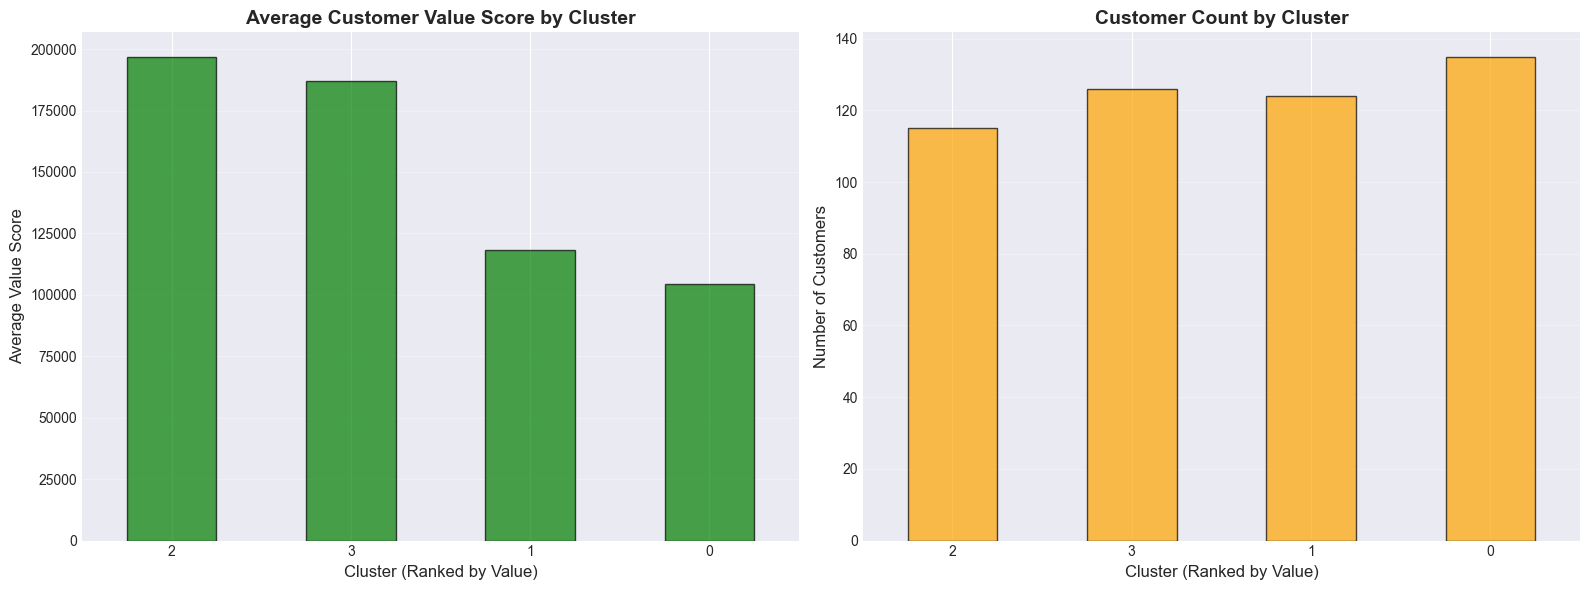


 HIGH-VALUE CLUSTER IDENTIFIED: Cluster 2
   - Average Value Score: 196,996.88
   - Customer Count: 115
   - Average Income: ₹79,421.49
   - Average Spending Score: 71.36


In [15]:
# IDENTIFY HIGH-VALUE CUSTOMER GROUPS

# Calculate customer value score
df['Customer_Value_Score'] = (
    df['Annual_Income'] * 0.3 + 
    df['Spending_Score'] * 2000 + 
    df['Purchase_Frequency'] * 500 + 
    df['Average_Transaction_Value'] * 50
)

# Analyze value by cluster
value_by_cluster = df.groupby('Cluster').agg({
    'Customer_Value_Score': 'mean',
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
    'Purchase_Frequency': 'mean',
    'CustomerID': 'count'
}).round(2)

value_by_cluster.columns = ['Avg_Value_Score', 'Avg_Income', 'Avg_Spending', 
                            'Avg_Frequency', 'Customer_Count']
value_by_cluster = value_by_cluster.sort_values('Avg_Value_Score', ascending=False)

print("\n" + "="*70)
print("HIGH-VALUE CUSTOMER SEGMENT ANALYSIS")
print("="*70)
print(value_by_cluster)

# Visualize high-value segments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Customer Value Score by Cluster
value_by_cluster['Avg_Value_Score'].plot(kind='bar', ax=ax1, color='green', 
                                         edgecolor='black', alpha=0.7)
ax1.set_title('Average Customer Value Score by Cluster', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cluster (Ranked by Value)', fontsize=12)
ax1.set_ylabel('Average Value Score', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(alpha=0.3, axis='y')

# Customer Count by Cluster
value_by_cluster['Customer_Count'].plot(kind='bar', ax=ax2, color='orange', 
                                       edgecolor='black', alpha=0.7)
ax2.set_title('Customer Count by Cluster', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cluster (Ranked by Value)', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Identify high-value cluster
high_value_cluster = value_by_cluster.index[0]
print(f"\n HIGH-VALUE CLUSTER IDENTIFIED: Cluster {high_value_cluster}")
print(f"   - Average Value Score: {value_by_cluster.loc[high_value_cluster, 'Avg_Value_Score']:,.2f}")
print(f"   - Customer Count: {int(value_by_cluster.loc[high_value_cluster, 'Customer_Count'])}")
print(f"   - Average Income: ₹{value_by_cluster.loc[high_value_cluster, 'Avg_Income']:,.2f}")
print(f"   - Average Spending Score: {value_by_cluster.loc[high_value_cluster, 'Avg_Spending']:.2f}")

In [16]:
# CUSTOMER SEGMENT PROFILES

print("\n" + "="*70)
print("CUSTOMER SEGMENT PROFILES")
print("="*70)

cluster_names = {
    0: "Budget Conscious",
    1: "Potential Loyalists", 
    2: "High Value",
    3: "At Risk"
}

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n📊 Cluster {cluster_id}: {cluster_names.get(cluster_id, 'Unknown')}")
    print(f"   Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   Avg Income: ₹{cluster_data['Annual_Income'].mean():,.0f}")
    print(f"   Avg Spending Score: {cluster_data['Spending_Score'].mean():.1f}")
    print(f"   Avg Purchase Frequency: {cluster_data['Purchase_Frequency'].mean():.1f}")
    print(f"   Avg Transaction Value: ₹{cluster_data['Average_Transaction_Value'].mean():.0f}")


CUSTOMER SEGMENT PROFILES

📊 Cluster 0: Budget Conscious
   Size: 135 customers (27.0%)
   Avg Income: ₹88,244
   Avg Spending Score: 30.9
   Avg Purchase Frequency: 10.8
   Avg Transaction Value: ₹218

📊 Cluster 1: Potential Loyalists
   Size: 124 customers (24.8%)
   Avg Income: ₹92,239
   Avg Spending Score: 28.3
   Avg Purchase Frequency: 36.8
   Avg Transaction Value: ₹309

📊 Cluster 2: High Value
   Size: 115 customers (23.0%)
   Avg Income: ₹79,421
   Avg Spending Score: 71.4
   Avg Purchase Frequency: 20.6
   Avg Transaction Value: ₹403

📊 Cluster 3: At Risk
   Size: 126 customers (25.2%)
   Avg Income: ₹65,581
   Avg Spending Score: 72.0
   Avg Purchase Frequency: 32.5
   Avg Transaction Value: ₹144


In [17]:
# SAVE RESULTS

# Save clustered data to CSV
output_file = 'customer_segments.csv'
df.to_csv(output_file, index=False)
print(f"\n✓ Results saved to '{output_file}'")

# Create summary report
summary = {
    'Total_Customers': len(df),
    'Number_of_Clusters': optimal_k,
    'Silhouette_Score': silhouette_score(X_scaled, df['Cluster']),
    'High_Value_Cluster': int(high_value_cluster),
    'High_Value_Customer_Count': int(value_by_cluster.loc[high_value_cluster, 'Customer_Count'])
}

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
for key, value in summary.items():
    print(f"{key}: {value}")

print("\n✅ Customer Segmentation Analysis Completed Successfully!")


✓ Results saved to 'customer_segments.csv'

FINAL SUMMARY
Total_Customers: 500
Number_of_Clusters: 4
Silhouette_Score: 0.194452902335011
High_Value_Cluster: 2
High_Value_Customer_Count: 115

✅ Customer Segmentation Analysis Completed Successfully!
